In [1]:
pip install tensorflow numpy matplotlib scikit-learn

     ------------------------------------ 376.9/376.9 MB 440.4 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 127.7/127.7 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 14.9

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\ADMIN\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
pip install tensorflow


  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-win_amd64.whl (127 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached grpcio-1.64.1-cp39-cp39-win_amd64.whl (4.1 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      S

In [5]:
!pip install tensorflow

In [6]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Charger les données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Définir les classes qui peuvent voler et ne peuvent pas voler
peut_voler = [0, 2]  # avion et oiseau
ne_peut_pas_voler = [1, 3, 4, 5, 6, 7, 8, 9]  # automobile, grenouille, cerf, etc.

# Convertir les étiquettes en classes binaires
def convertir_les_etiquettes(y, peut_voler, ne_peut_pas_voler):
    y_binaire = np.where(np.isin(y, peut_voler), 1, 0)
    return y_binaire

y_train_binaire = convertir_les_etiquettes(y_train, peut_voler, ne_peut_pas_voler)
y_test_binaire = convertir_les_etiquettes(y_test, peut_voler, ne_peut_pas_voler)

# Normaliser les images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\ADMIN\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(x_train, y_train_binaire, epochs=10, validation_data=(x_test, y_test_binaire), batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step - accuracy: 0.8096 - loss: 0.4395 - val_accuracy: 0.8456 - val_loss: 0.3742
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8477 - loss: 0.3642 - val_accuracy: 0.8635 - val_loss: 0.3378
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8654 - loss: 0.3324 - val_accuracy: 0.8729 - val_loss: 0.3099
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.8742 - loss: 0.3056 - val_accuracy: 0.8797 - val_loss: 0.2975
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8833 - loss: 0.2868 - val_accuracy: 0.8814 - val_loss: 0.2916
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.8887 - loss: 0.2708 - val_accuracy: 0.8809 - val_loss: 0.2895
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.8994 - loss: 0.2533 - val_accuracy: 0.8893 - val_loss: 0.2730
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9025 - loss: 0.2397 - 

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Faire des prédictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calculer les métriques
precision = precision_score(y_test_binaire, y_pred)
recall = recall_score(y_test_binaire, y_pred)
f1 = f1_score(y_test_binaire, y_pred)
accuracy = accuracy_score(y_test_binaire, y_pred)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test_binaire, y_pred)

print(f"Précision : {precision}")
print(f"Rappel : {recall}")
print(f"Score F1 : {f1}")
print(f"Exactitude : {accuracy}")
print(f"Matrice de confusion :\n {conf_matrix}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Précision : 0.8201725282017253
Rappel : 0.618
Score F1 : 0.7048759623609923
Exactitude : 0.8965
Matrice de confusion :
 [[7729  271]
 [ 764 1236]]


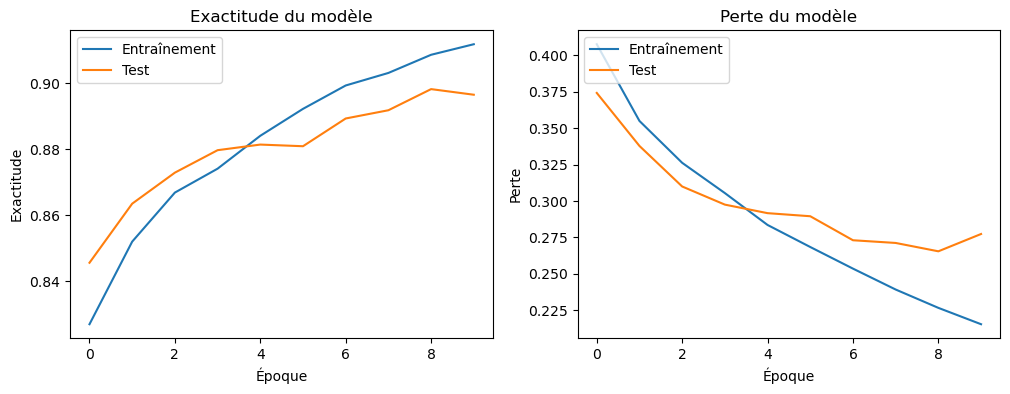

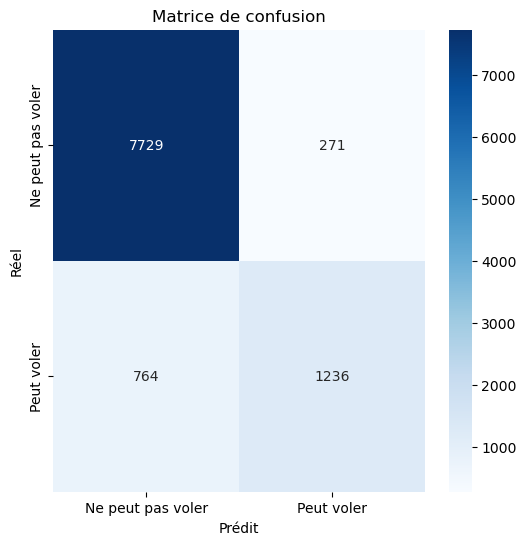

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer les valeurs de l'exactitude de l'entraînement et de la validation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitude du modèle')
plt.xlabel('Époque')
plt.ylabel('Exactitude')
plt.legend(['Entraînement', 'Test'], loc='upper left')

# Tracer les valeurs de la perte de l'entraînement et de la validation
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte du modèle')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend(['Entraînement', 'Test'], loc='upper left')

plt.show()

# Tracer la matrice de confusion
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ne peut pas voler', 'Peut voler'], yticklabels=['Ne peut pas voler', 'Peut voler'])
plt.title('Matrice de confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()
